# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [1]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [2]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [3]:
def fetch_movie_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup=fetch_movie_urls(url)
print(soup.prettify())

## Hint : Use the following code to extract the film urls
# movie_links = soup.find_all('a', href=True)
# movie_urls = [link['href'] for link in movie_links if '/movie/' in link['href']]

# url_list=[]
# for x in movie_urls:
#   url_list.append('https://www.justwatch.com'+x)

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [4]:
# Write Your Code here
movie_links = soup.find_all('a', href=True)
movie_urls = [link['href'] for link in movie_links if '/movie/' in link['href']]

url_list=[]
for x in movie_urls:
  url_list.append('https://www.justwatch.com'+x)
print(url_list)

['https://www.justwatch.com/in/movie/bhool-chuk-maaf', 'https://www.justwatch.com/in/movie/hit-3', 'https://www.justwatch.com/in/movie/jaat-2025', 'https://www.justwatch.com/in/movie/raid-2', 'https://www.justwatch.com/in/movie/housefull-5', 'https://www.justwatch.com/in/movie/alappuzha-gymkhana', 'https://www.justwatch.com/in/movie/sister-midnight', 'https://www.justwatch.com/in/movie/tourist-family-2025', 'https://www.justwatch.com/in/movie/final-destination-bloodlines', 'https://www.justwatch.com/in/movie/365-days', 'https://www.justwatch.com/in/movie/mission-impossible-7', 'https://www.justwatch.com/in/movie/sikandar-2025', 'https://www.justwatch.com/in/movie/pushpa-the-rule-part-2', 'https://www.justwatch.com/in/movie/sinners-2025', 'https://www.justwatch.com/in/movie/thudarum', 'https://www.justwatch.com/in/movie/mon-potongo', 'https://www.justwatch.com/in/movie/mission-impossible-dead-reckoning-part-two', 'https://www.justwatch.com/in/movie/the-diplomat', 'https://www.justwatch.

In [5]:
for movie_url in url_list:
  print(movie_url)

https://www.justwatch.com/in/movie/bhool-chuk-maaf
https://www.justwatch.com/in/movie/hit-3
https://www.justwatch.com/in/movie/jaat-2025
https://www.justwatch.com/in/movie/raid-2
https://www.justwatch.com/in/movie/housefull-5
https://www.justwatch.com/in/movie/alappuzha-gymkhana
https://www.justwatch.com/in/movie/sister-midnight
https://www.justwatch.com/in/movie/tourist-family-2025
https://www.justwatch.com/in/movie/final-destination-bloodlines
https://www.justwatch.com/in/movie/365-days
https://www.justwatch.com/in/movie/mission-impossible-7
https://www.justwatch.com/in/movie/sikandar-2025
https://www.justwatch.com/in/movie/pushpa-the-rule-part-2
https://www.justwatch.com/in/movie/sinners-2025
https://www.justwatch.com/in/movie/thudarum
https://www.justwatch.com/in/movie/mon-potongo
https://www.justwatch.com/in/movie/mission-impossible-dead-reckoning-part-two
https://www.justwatch.com/in/movie/the-diplomat
https://www.justwatch.com/in/movie/retro
https://www.justwatch.com/in/movie/ch

## **Scrapping Movie Title**

In [6]:
def fetch_movie_details(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

In [7]:
movie_pages = []
for movie_url in url_list:
    movie_soup = fetch_movie_details(movie_url)
    movie_pages.append(movie_soup)


In [8]:
# Write Your Code here
movie_titles=[]
for movie_page in movie_pages:
  movie_title = movie_page.find('h1', class_='title-detail-hero__details__title').text
  movie_titles.append(movie_title)

for movie in movie_titles:
  movie_title = re.sub(r'\(\d{4}\)', '', movie).strip()
  print(movie_title)

Bhool Chuk Maaf
HIT: The Third Case
Jaat
Raid 2
Housefull 5
Alappuzha Gymkhana
Sister Midnight
Tourist Family
Final Destination Bloodlines
365 Days
Mission: Impossible - Dead Reckoning Part One
Sikandar
Pushpa: The Rule - Part 2
Sinners
Thudarum
Mon Potongo
Mission: Impossible - The Final Reckoning
The Diplomat
Retro
Chhaava
Odela 2
Good Bad Ugly
Final Destination
A Minecraft Movie
Kesari Chapter 2: The Untold Story of Jallianwala Bagh
Arjun S/O Vyjayanthi
Captain America: Brave New World
The Accountant²
Thunderbolts*
HIT: The First Case
Maranamass
Stolen
HIT: The 2nd Case
A Working Man
Raid
Until Dawn
Dragon
American Kamasutra
Conclave
Deva
Fountain of Youth
Dangal
Mission: Impossible - Fallout
Marco
Veera Dheera Sooran: Part 2
The Seed of the Sacred Fig
Court - State Vs. A Nobody
Chennai Express
L2: Empuraan
We Live in Time
Deadly Virtues: Love. Honour. Obey.
Babygirl
Lucky Baskhar
Robinhood
Teri Baaton Mein Aisa Uljha Jiya
Top Gun: Maverick
Karate Kid: Legends
Hippi
Vadakkan
K.G.F: 

## **Scrapping release Year**

In [9]:
# Write Your Code here
years = []
for movie_page in movie_pages:
  release_year = movie_page.find('span', class_='release-year').text
  years.append(release_year)
for i in years:
  year = re.sub('[()]','', i).strip()
  print(year)

2025
2025
2025
2025
2025
2025
2025
2025
2025
2020
2023
2025
2024
2025
2025
2024
2025
2025
2025
2025
2025
2025
2000
2025
2025
2025
2025
2025
2025
2020
2025
2025
2022
2025
2018
2025
2025
2018
2024
2025
2025
2016
2018
2024
2025
2024
2025
2013
2025
2024
2014
2024
2024
2025
2024
2022
2025
2019
2025
2022
2015
2025
2025
2025
2024
2024
2025
2024
2025
2025
2025
2024
2014
2025
2024
2001
2012
2024
2024
2019
2025
2025
2025
2024
2023
2011
2003
2025
2016
2021
2025
2025
2021
2020
2019
2022
2012
2025
2019
2025
2025
2025
2025
2025
2025
2025
2024
2025
2026
2025


In [10]:
for key, value in zip(movie_titles, years):
  print(f"{key} : {value}")

 Bhool Chuk Maaf (2025) : (2025)
 HIT: The Third Case (2025) : (2025)
 Jaat (2025) : (2025)
 Raid 2 (2025) : (2025)
 Housefull 5 (2025) : (2025)
 Alappuzha Gymkhana (2025) : (2025)
 Sister Midnight (2025) : (2025)
 Tourist Family (2025) : (2025)
 Final Destination Bloodlines (2025) : (2025)
 365 Days (2020) : (2020)
 Mission: Impossible - Dead Reckoning Part One (2023) : (2023)
 Sikandar (2025) : (2025)
 Pushpa: The Rule - Part 2 (2024) : (2024)
 Sinners (2025) : (2025)
 Thudarum (2025) : (2025)
 Mon Potongo (2024) : (2024)
 Mission: Impossible - The Final Reckoning (2025) : (2025)
 The Diplomat (2025) : (2025)
 Retro (2025) : (2025)
 Chhaava (2025) : (2025)
 Odela 2 (2025) : (2025)
 Good Bad Ugly (2025) : (2025)
 Final Destination (2000) : (2000)
 A Minecraft Movie (2025) : (2025)
 Kesari Chapter 2: The Untold Story of Jallianwala Bagh (2025) : (2025)
 Arjun S/O Vyjayanthi (2025) : (2025)
 Captain America: Brave New World (2025) : (2025)
 The Accountant² (2025) : (2025)
 Thunderbolts*

In [11]:
movie_cleaned = []
for movie in movie_titles:
  movie_title = re.sub(r'\(\d{4}\)', '', movie).strip()
  movie_cleaned.append(movie_title)

year_cleaned = []
for i in years:
  year = re.sub('[()]','', i).strip()
  year_cleaned.append(year)

for key, value in zip(movie_cleaned, year_cleaned):
  print(f"{key} : {value}")


Bhool Chuk Maaf : 2025
HIT: The Third Case : 2025
Jaat : 2025
Raid 2 : 2025
Housefull 5 : 2025
Alappuzha Gymkhana : 2025
Sister Midnight : 2025
Tourist Family : 2025
Final Destination Bloodlines : 2025
365 Days : 2020
Mission: Impossible - Dead Reckoning Part One : 2023
Sikandar : 2025
Pushpa: The Rule - Part 2 : 2024
Sinners : 2025
Thudarum : 2025
Mon Potongo : 2024
Mission: Impossible - The Final Reckoning : 2025
The Diplomat : 2025
Retro : 2025
Chhaava : 2025
Odela 2 : 2025
Good Bad Ugly : 2025
Final Destination : 2000
A Minecraft Movie : 2025
Kesari Chapter 2: The Untold Story of Jallianwala Bagh : 2025
Arjun S/O Vyjayanthi : 2025
Captain America: Brave New World : 2025
The Accountant² : 2025
Thunderbolts* : 2025
HIT: The First Case : 2020
Maranamass : 2025
Stolen : 2025
HIT: The 2nd Case : 2022
A Working Man : 2025
Raid : 2018
Until Dawn : 2025
Dragon : 2025
American Kamasutra : 2018
Conclave : 2024
Deva : 2025
Fountain of Youth : 2025
Dangal : 2016
Mission: Impossible - Fallout :

## **Scrapping Genres**

In [12]:
# Write Your Code here
genres_list = []

for movie_page in movie_pages:
    genre = "Unknown"

    # Find all genre sections
    sections = movie_page.find_all('div', class_='poster-detail-infos')

    for section in sections:
        heading = section.find('h3', class_='poster-detail-infos__subheading')
        if heading and 'Genres' in heading.text:
            value_div = section.find('div', class_='poster-detail-infos__value')
            if value_div:
                span = value_div.find('span')
                if span:
                    genre = span.text.strip()
            break  # Stop after finding the genre section

    genres_list.append(genre)

print(genres_list)


['Comedy, Romance, Science-Fiction, Fantasy', 'Crime, Mystery & Thriller, Action & Adventure', 'Crime, Drama, Action & Adventure, Mystery & Thriller', 'Crime, Drama, Mystery & Thriller', 'Comedy, Mystery & Thriller, Drama', 'Drama, Comedy, Action & Adventure', 'Comedy, Drama, Horror', 'Comedy, Drama, Kids & Family', 'Horror', 'Drama, Romance, Made in Europe', 'Mystery & Thriller, Action & Adventure', 'Drama, Action & Adventure, Mystery & Thriller', 'Action & Adventure, Crime, Drama, Mystery & Thriller', 'Action & Adventure, Drama, Horror, Mystery & Thriller', 'Drama, Mystery & Thriller', 'Drama, Romance', 'Mystery & Thriller, Action & Adventure', 'Drama', 'Romance, Action & Adventure, Drama, Crime', 'Action & Adventure, Drama, History', 'Mystery & Thriller, Crime, Drama', 'Action & Adventure, Crime, Drama, Mystery & Thriller, Comedy', 'Horror, Mystery & Thriller', 'Comedy, Kids & Family, Fantasy, Animation', 'Drama, History', 'Mystery & Thriller, Action & Adventure, Crime', 'Science-Fi

In [13]:
for key, value in zip(movie_cleaned, genres_list ):
  print(f"{key} : {value}")

Bhool Chuk Maaf : Comedy, Romance, Science-Fiction, Fantasy
HIT: The Third Case : Crime, Mystery & Thriller, Action & Adventure
Jaat : Crime, Drama, Action & Adventure, Mystery & Thriller
Raid 2 : Crime, Drama, Mystery & Thriller
Housefull 5 : Comedy, Mystery & Thriller, Drama
Alappuzha Gymkhana : Drama, Comedy, Action & Adventure
Sister Midnight : Comedy, Drama, Horror
Tourist Family : Comedy, Drama, Kids & Family
Final Destination Bloodlines : Horror
365 Days : Drama, Romance, Made in Europe
Mission: Impossible - Dead Reckoning Part One : Mystery & Thriller, Action & Adventure
Sikandar : Drama, Action & Adventure, Mystery & Thriller
Pushpa: The Rule - Part 2 : Action & Adventure, Crime, Drama, Mystery & Thriller
Sinners : Action & Adventure, Drama, Horror, Mystery & Thriller
Thudarum : Drama, Mystery & Thriller
Mon Potongo : Drama, Romance
Mission: Impossible - The Final Reckoning : Mystery & Thriller, Action & Adventure
The Diplomat : Drama
Retro : Romance, Action & Adventure, Drama

## **Scrapping IMBD Rating**

In [14]:
# Write Your Code here
imdb_ratings_list = []
for movie_page in movie_pages:
    imdb_rating_element = movie_page.find('span', class_='imdb-score')

    if imdb_rating_element is not None:
        imdb_rating = imdb_rating_element.text.split()[0]
        print(imdb_rating)
    else:
        print("IMDb rating not found for this element")
        imdb_rating = None
    imdb_ratings_list.append(imdb_rating)

6.0
7.0
6.2
7.1
3.8
7.2
6.6
8.3
7.0
3.3
7.6
3.8
6.1
7.8
7.7
6.8
7.5
7.0
6.9
7.3
4.9
5.7
6.7
5.7
8.2
4.7
5.7
6.8
7.5
7.6
IMDb rating not found for this element
IMDb rating not found for this element
7.2
5.7
7.4
5.8
7.9
3.0
7.4
6.7
5.7
8.3
7.7
6.8
6.9
7.6
7.9
6.2
6.2
7.0
4.8
5.8
8.0
4.5
6.2
8.2
6.6
4.6
7.6
8.2
4.3
6.1
7.4
6.3
7.5
6.6
4.1
7.2
6.8
4.6
7.7
7.2
7.5
6.8
5.3
7.7
6.2
6.9
7.0
7.0
6.2
7.0
4.9
7.9
6.8
5.9
8.1
7.6
7.3
7.4
5.8
5.1
6.3
7.3
7.0
4.8
7.4
6.6
7.3
6.7
6.0
7.0
6.2
7.1
3.8
IMDb rating not found for this element
9.0
IMDb rating not found for this element
IMDb rating not found for this element
IMDb rating not found for this element


In [15]:
for key, value in zip(movie_cleaned, imdb_ratings_list):
  print(f"{key} : {value}")

Bhool Chuk Maaf : 6.0
HIT: The Third Case : 7.0
Jaat : 6.2
Raid 2 : 7.1
Housefull 5 : 3.8
Alappuzha Gymkhana : 7.2
Sister Midnight : 6.6
Tourist Family : 8.3
Final Destination Bloodlines : 7.0
365 Days : 3.3
Mission: Impossible - Dead Reckoning Part One : 7.6
Sikandar : 3.8
Pushpa: The Rule - Part 2 : 6.1
Sinners : 7.8
Thudarum : 7.7
Mon Potongo : 6.8
Mission: Impossible - The Final Reckoning : 7.5
The Diplomat : 7.0
Retro : 6.9
Chhaava : 7.3
Odela 2 : 4.9
Good Bad Ugly : 5.7
Final Destination : 6.7
A Minecraft Movie : 5.7
Kesari Chapter 2: The Untold Story of Jallianwala Bagh : 8.2
Arjun S/O Vyjayanthi : 4.7
Captain America: Brave New World : 5.7
The Accountant² : 6.8
Thunderbolts* : 7.5
HIT: The First Case : 7.6
Maranamass : None
Stolen : None
HIT: The 2nd Case : 7.2
A Working Man : 5.7
Raid : 7.4
Until Dawn : 5.8
Dragon : 7.9
American Kamasutra : 3.0
Conclave : 7.4
Deva : 6.7
Fountain of Youth : 5.7
Dangal : 8.3
Mission: Impossible - Fallout : 7.7
Marco : 6.8
Veera Dheera Sooran: Pa

## **Scrapping Runtime/Duration**

In [16]:
import re

runtime_list = []
runtime_pattern = re.compile(r'\d+h\s\d+min|\d+h|\d+min')  # matches "2h 33min", "2h", or "33min"

for movie_page in movie_pages:
    detail_divs = movie_page.find_all('div', class_='title-detail-hero-details__item')

    runtime = None
    for div in detail_divs:
        if not div.find('img'):  # Skip divs with <img>
            text = div.get_text(strip=True)
            if runtime_pattern.fullmatch(text):
                runtime = text
                break

    if runtime:
        print(runtime)
        runtime_list.append(runtime)
    else:
        print("Runtime info not found for a movie")
        runtime_list.append(None)




2h 1min
2h 37min
2h 33min
2h 25min
2h 43min
2h 20min
1h 47min
2h 8min
1h 50min
1h 54min
2h 44min
2h 13min
3h 21min
2h 17min
2h 43min
2h 29min
2h 49min
2h 10min
2h 42min
2h 41min
2h 30min
2h 19min
1h 37min
1h 41min
2h 15min
2h 22min
1h 58min
2h 13min
2h 7min
2h 6min
2h 19min
1h 34min
2h 30min
1h 56min
2h 0min
1h 43min
2h 37min
1h 28min
2h 0min
2h 36min
2h 6min
2h 41min
2h 27min
2h 25min
2h 42min
2h 47min
2h 35min
2h 21min
2h 59min
1h 48min
1h 26min
1h 54min
2h 28min
2h 30min
2h 21min
2h 11min
1h 34min
2h 23min
2h 0min
2h 46min
1h 28min
1h 35min
2h 4min
2h 9min
2h 19min
2h 24min
2h 22min
2h 21min
2h 17min
2h 13min
2h 10min
2h 13min
1h 41min
1h 34min
2h 33min
2h 32min
1h 44min
2h 27min
1h 51min
1h 49min
2h 2min
1h 49min
2h 6min
1h 25min
2h 4min
1h 31min
2h 11min
1h 25min
2h 8min
1h 31min
1h 58min
1h 30min
1h 58min
2h 45min
2h 52min
1h 42min
2h 37min
2h 2min
1h 52min
2h 7min
2h 1min
2h 37min
2h 33min
2h 25min
2h 43min
Runtime info not found for a movie
1h 58min
2h 35min
Runtime info not fo

In [17]:
for key, value in zip(movie_cleaned, runtime_list):
  print(f"{key} : {value}")

Bhool Chuk Maaf : 2h 1min
HIT: The Third Case : 2h 37min
Jaat : 2h 33min
Raid 2 : 2h 25min
Housefull 5 : 2h 43min
Alappuzha Gymkhana : 2h 20min
Sister Midnight : 1h 47min
Tourist Family : 2h 8min
Final Destination Bloodlines : 1h 50min
365 Days : 1h 54min
Mission: Impossible - Dead Reckoning Part One : 2h 44min
Sikandar : 2h 13min
Pushpa: The Rule - Part 2 : 3h 21min
Sinners : 2h 17min
Thudarum : 2h 43min
Mon Potongo : 2h 29min
Mission: Impossible - The Final Reckoning : 2h 49min
The Diplomat : 2h 10min
Retro : 2h 42min
Chhaava : 2h 41min
Odela 2 : 2h 30min
Good Bad Ugly : 2h 19min
Final Destination : 1h 37min
A Minecraft Movie : 1h 41min
Kesari Chapter 2: The Untold Story of Jallianwala Bagh : 2h 15min
Arjun S/O Vyjayanthi : 2h 22min
Captain America: Brave New World : 1h 58min
The Accountant² : 2h 13min
Thunderbolts* : 2h 7min
HIT: The First Case : 2h 6min
Maranamass : 2h 19min
Stolen : 1h 34min
HIT: The 2nd Case : 2h 30min
A Working Man : 1h 56min
Raid : 2h 0min
Until Dawn : 1h 43min

## **Scrapping Age Rating**

In [18]:
# Write Your Code here
import re

age_rating_list = []

# Define known valid ratings
valid_ratings = {
    'U', 'UA', 'A',
    '7+', '8+', '9+', '10+', '11+', '12+', '13+', '14+', '15+', '16+', '17+', '18+'
}

for movie_page in movie_pages:
    age_rating = None

    scroll_container = movie_page.find('div', class_='hidden-horizontal-scrollbar')
    if not scroll_container:
        age_rating_list.append(None)
        continue

    detail_items = scroll_container.find_all('div', class_='title-detail-hero-details__item')

    for div in detail_items:
        text = div.get_text(strip=True)

        # Remove "Age rating" suffix if present
        if "Age rating" in text:
            text = text.replace("Age rating", "").strip()

        # Normalize patterns like "07+", "08+", etc.
        match = re.match(r'^0*(\d{1,2})\+$', text)
        if match:
            normalized = match.group(1) + '+'
            if normalized in valid_ratings:
                age_rating = normalized
                break

        # Catch ratings like "A", "U", "UA"
        if text in valid_ratings:
            age_rating = text
            break

    age_rating_list.append(age_rating)
    print(age_rating if age_rating else "Age rating not found for a movie")

Age rating not found for a movie
A
Age rating not found for a movie
Age rating not found for a movie
Age rating not found for a movie
Age rating not found for a movie
A
U
A
A
UA
Age rating not found for a movie
UA
A
Age rating not found for a movie
A
Age rating not found for a movie
Age rating not found for a movie
Age rating not found for a movie
A
A
Age rating not found for a movie
A
Age rating not found for a movie
Age rating not found for a movie
UA
Age rating not found for a movie
A
Age rating not found for a movie
UA
Age rating not found for a movie
Age rating not found for a movie
A
Age rating not found for a movie
UA
A
Age rating not found for a movie
Age rating not found for a movie
Age rating not found for a movie
Age rating not found for a movie
Age rating not found for a movie
U
UA
A
Age rating not found for a movie
Age rating not found for a movie
Age rating not found for a movie
UA
Age rating not found for a movie
UA
Age rating not found for a movie
A
Age rating not found

In [19]:
for key, value in zip(movie_cleaned, age_rating_list):
  print(f"{key} : {value}")

Bhool Chuk Maaf : None
HIT: The Third Case : A
Jaat : None
Raid 2 : None
Housefull 5 : None
Alappuzha Gymkhana : None
Sister Midnight : A
Tourist Family : U
Final Destination Bloodlines : A
365 Days : A
Mission: Impossible - Dead Reckoning Part One : UA
Sikandar : None
Pushpa: The Rule - Part 2 : UA
Sinners : A
Thudarum : None
Mon Potongo : A
Mission: Impossible - The Final Reckoning : None
The Diplomat : None
Retro : None
Chhaava : A
Odela 2 : A
Good Bad Ugly : None
Final Destination : A
A Minecraft Movie : None
Kesari Chapter 2: The Untold Story of Jallianwala Bagh : None
Arjun S/O Vyjayanthi : UA
Captain America: Brave New World : None
The Accountant² : A
Thunderbolts* : None
HIT: The First Case : UA
Maranamass : None
Stolen : None
HIT: The 2nd Case : A
A Working Man : None
Raid : UA
Until Dawn : A
Dragon : None
American Kamasutra : None
Conclave : None
Deva : None
Fountain of Youth : None
Dangal : U
Mission: Impossible - Fallout : UA
Marco : A
Veera Dheera Sooran: Part 2 : None
The

## **Fetching Production Countries Details**

In [20]:
# Write Your Code here
production_countries_list = []

for movie_page in movie_pages:
    country = None

    # Find the 'Production country' heading
    heading = movie_page.find('h3', class_='poster-detail-infos__subheading', string='Production country')

    if heading:
        # Navigate to the parent container
        parent_div = heading.find_parent('div', class_='poster-detail-infos')

        # Find all value divs within this parent
        value_divs = parent_div.find_all('div', class_='poster-detail-infos__value')

        if value_divs:
            # The actual country is typically in the last value div
            country = value_divs[-1].get_text(strip=True)
            print(country)
        else:
            print("Country value div not found")
    else:
        print("Production country heading not found")

    production_countries_list.append(country)


India, United States
India
India
India
India, United Kingdom
India
United Kingdom, India, Sweden
India
United States
Poland
United States
India
India
United States, Australia, Canada
India
India
United States
India
India
India
India
India
United States
New Zealand, Canada, United States, Sweden
Ireland, India
India
Canada, United States
United States
United States
India
India
India
India
United States, United Kingdom
India
Hungary, United States
India
United States
United States, United Kingdom
India
United States, United Kingdom
United States, India
United States
India
India
France, Germany, Iran
India
India
India
United Kingdom, France
Netherlands, United Kingdom
Netherlands, United States
India
India, WEBAPP_COUNTRY_BD
India
United States
Canada, United States
India
India, Finland
India
Finland
Ireland, United States
India
India
United States
India
India
France, United Kingdom
United States, United Kingdom
India
India
United States
United States
United States
India
United Kingdom, U

In [21]:
for key, value in zip(movie_cleaned, production_countries_list):
  print(f"{key} : {value}")

Bhool Chuk Maaf : India, United States
HIT: The Third Case : India
Jaat : India
Raid 2 : India
Housefull 5 : India, United Kingdom
Alappuzha Gymkhana : India
Sister Midnight : United Kingdom, India, Sweden
Tourist Family : India
Final Destination Bloodlines : United States
365 Days : Poland
Mission: Impossible - Dead Reckoning Part One : United States
Sikandar : India
Pushpa: The Rule - Part 2 : India
Sinners : United States, Australia, Canada
Thudarum : India
Mon Potongo : India
Mission: Impossible - The Final Reckoning : United States
The Diplomat : India
Retro : India
Chhaava : India
Odela 2 : India
Good Bad Ugly : India
Final Destination : United States
A Minecraft Movie : New Zealand, Canada, United States, Sweden
Kesari Chapter 2: The Untold Story of Jallianwala Bagh : Ireland, India
Arjun S/O Vyjayanthi : India
Captain America: Brave New World : Canada, United States
The Accountant² : United States
Thunderbolts* : United States
HIT: The First Case : India
Maranamass : India
Stol

## **Fetching Streaming Service Details**

In [22]:
# Write Your Code here
streaming_providers_list = []

for movie_page in movie_pages:
    provider_name = None

    # Look for the <img> tag with a known class or data attribute
    provider_img = movie_page.find('img', attrs={'data-testid': 'provider-icon-override'})

    if provider_img:
        # Extract from the 'alt' or 'title' attribute
        provider_name = provider_img.get('alt') or provider_img.get('title')
        print(provider_name)
    else:
        print("Streaming provider not found")

    streaming_providers_list.append(provider_name)


Amazon Prime Video
Netflix
Netflix
Amazon Prime Video
Bookmyshow
Sony Liv
Bookmyshow
JioHotstar
Bookmyshow
Netflix
Apple TV
Netflix
Amazon Prime Video
Apple TV
JioHotstar
Amazon Prime Video
Bookmyshow
Netflix
Netflix
Netflix
Amazon Prime Video
Netflix
Amazon Prime Video
Apple TV
JioHotstar
Amazon Prime Video
JioHotstar
Amazon Prime Video
Bookmyshow
Amazon Prime Video
Sony Liv
Amazon Prime Video
Amazon Prime Video
Amazon Prime Video
JioHotstar
Apple TV
Netflix
JustWatchTV
Amazon Prime Video
Netflix
Apple TV+
Amazon Prime Video
Apple TV
Amazon Prime Video
Amazon Prime Video
Amazon Prime Video
Netflix
Apple TV
JioHotstar
Apple TV
Amazon Prime Video
Amazon Prime Video
Netflix
Zee5
Amazon Prime Video
Apple TV
Amazon Prime Video
Amazon Prime Video
Amazon Prime Video
Amazon Prime Video
Amazon Prime Video
Apple TV
JioHotstar
Amazon Prime Video
JioHotstar
Amazon Prime Video
Bookmyshow
MUBI
Apple TV
Netflix
Amazon Prime Video
Apple TV
Apple TV
Apple TV
Amazon Prime Video
Apple TV
Filmzie
Amazon 

In [23]:
for key, value in zip(movie_cleaned,streaming_providers_list ):
  print(f"{key} : {value}")

Bhool Chuk Maaf : Amazon Prime Video
HIT: The Third Case : Netflix
Jaat : Netflix
Raid 2 : Amazon Prime Video
Housefull 5 : Bookmyshow
Alappuzha Gymkhana : Sony Liv
Sister Midnight : Bookmyshow
Tourist Family : JioHotstar
Final Destination Bloodlines : Bookmyshow
365 Days : Netflix
Mission: Impossible - Dead Reckoning Part One : Apple TV
Sikandar : Netflix
Pushpa: The Rule - Part 2 : Amazon Prime Video
Sinners : Apple TV
Thudarum : JioHotstar
Mon Potongo : Amazon Prime Video
Mission: Impossible - The Final Reckoning : Bookmyshow
The Diplomat : Netflix
Retro : Netflix
Chhaava : Netflix
Odela 2 : Amazon Prime Video
Good Bad Ugly : Netflix
Final Destination : Amazon Prime Video
A Minecraft Movie : Apple TV
Kesari Chapter 2: The Untold Story of Jallianwala Bagh : JioHotstar
Arjun S/O Vyjayanthi : Amazon Prime Video
Captain America: Brave New World : JioHotstar
The Accountant² : Amazon Prime Video
Thunderbolts* : Bookmyshow
HIT: The First Case : Amazon Prime Video
Maranamass : Sony Liv
Stol

## **Now Creating Movies DataFrame**

In [24]:
import pandas as pd

# Create empty DataFrame with correct column headers
movie_df = pd.DataFrame(columns=[
    'Movie',
    'Movie Release Year',
    'Genre',
    'IMDB Rating',
    'Runtime/Duration',
    'Age Rating',
    'Production Countries',
    'Streaming Service',
    'Movie Link'
])

# Loop through list indices and add rows
for i in range(len(movie_cleaned)):
    row_data = [
        movie_cleaned[i],
        year_cleaned[i],
        genres_list[i],
        imdb_ratings_list[i],
        runtime_list[i],
        age_rating_list[i],
        production_countries_list[i],
        streaming_providers_list[i],
        url_list[i]
    ]

    row_df = pd.DataFrame([row_data], columns=movie_df.columns)
    movie_df = pd.concat([movie_df, row_df], ignore_index=True)

# Now display the result
movie_df



Movie Movie Release Year  \
0          Bhool Chuk Maaf               2025   
1      HIT: The Third Case               2025   
2                     Jaat               2025   
3                   Raid 2               2025   
4              Housefull 5               2025   
..                     ...                ...   
105       Metro... In Dino               2025   
106  Quotation Gang Part 1               2024   
107     Sitaare Zameen Par               2025   
108                  Peddi               2026   
109               Dhadak 2               2025   

                                                 Genre IMDB Rating  \
0            Comedy, Romance, Science-Fiction, Fantasy         6.0   
1        Crime, Mystery & Thriller, Action & Adventure         7.0   
2    Crime, Drama, Action & Adventure, Mystery & Th...         6.2   
3                     Crime, Drama, Mystery & Thriller         7.1   
4                    Comedy, Mystery & Thriller, Drama         3.8   
..                                                 ...         ...   
105                                     Romance, Drama        None   
106      Crime, Mystery & Thriller, Action & Adventure         9.0   
107                               Comedy, Drama, Sport        None   
108                   Drama, Action & Adventure, Sport        None   
109                 Romance, Drama, Mystery & Thriller        None   

    Runtime/Duration Age Rating   Production Countries   Streaming Service  \
0            2h 1min       None   India, United States  Amazon Prime Video   
1           2h 37min          A                  India             Netflix   
2           2h 33min       None                  India             Netflix   
3           2h 25min       None                  India  Amazon Prime Video   
4           2h 43min       None  India, United Kingdom          Bookmyshow   
..               ...        ...                    ...                 ...   
105             None       None                  India           JustWatch   
106         1h 58min          A                  India          Bookmyshow   
107         2h 35min       None                  India           JustWatch   
108             None       None                  India           JustWatch   
109          2h 2min       None                  India           JustWatch   

                                            Movie Link  
0    https://www.justwatch.com/in/movie/bhool-chuk-...  
1             https://www.justwatch.com/in/movie/hit-3  
2         https://www.justwatch.com/in/movie/jaat-2025  
3            https://www.justwatch.com/in/movie/raid-2  
4       https://www.justwatch.com/in/movie/housefull-5  
..                                                 ...  
105   https://www.justwatch.com/in/movie/metro-in-dino  
106  https://www.justwatch.com/in/movie/quotation-gang  
107  https://www.justwatch.com/in/movie/sitaare-zam...  
108           https://www.justwatch.com/in/movie/peddi  
109        https://www.justwatch.com/in/movie/dhadak-2  

[110 rows x 9 columns]

## **Scraping TV  Show Data**

In [25]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

In [26]:
def fetch_tv_urls(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


tv_url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'
soup=fetch_tv_urls(tv_url)
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [27]:
# Write Your Code here
tvshow_links = soup.find_all('a', href=True)
tvshow_urls = [link['href'] for link in tvshow_links if '/tv-show/' in link['href']]

url_list=[]
for x in tvshow_urls:
  url_list.append('https://www.justwatch.com'+x)
print(url_list)

['https://www.justwatch.com/in/tv-show/the-royals-2025', 'https://www.justwatch.com/in/tv-show/the-last-of-us', 'https://www.justwatch.com/in/tv-show/farzi', 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'https://www.justwatch.com/in/tv-show/attack-on-titan', 'https://www.justwatch.com/in/tv-show/peaky-blinders', 'https://www.justwatch.com/in/tv-show/department-q', 'https://www.justwatch.com/in/tv-show/mobland', 'https://www.justwatch.com/in/tv-show/from', 'https://www.justwatch.com/in/tv-show/love-death-and-robots', 'https://www.justwatch.com/in/tv-show/panchayat', 'https://www.justwatch.com/in/tv-show/khauf', 'https://www.justwatch.com/in/tv-show/gram-chikitsalay', 'https://www.justwatch.com/in/tv-show/solo-leveling-2024', 'https://www.justwatch.com/in/tv-show/squid-game', 'https://www.justwatch.com/in/tv-show/criminal-justice-2019', 'https://www.justwatch.com/in/tv-show/weak-hero', 'https://www.justwatch.com/in/tv-show/apharan', 'https://www.justwatch.com/in/tv-show/mirzap

In [28]:
for tvshow_url in url_list:
  print(tvshow_url)


https://www.justwatch.com/in/tv-show/the-royals-2025
https://www.justwatch.com/in/tv-show/the-last-of-us
https://www.justwatch.com/in/tv-show/farzi
https://www.justwatch.com/in/tv-show/game-of-thrones
https://www.justwatch.com/in/tv-show/attack-on-titan
https://www.justwatch.com/in/tv-show/peaky-blinders
https://www.justwatch.com/in/tv-show/department-q
https://www.justwatch.com/in/tv-show/mobland
https://www.justwatch.com/in/tv-show/from
https://www.justwatch.com/in/tv-show/love-death-and-robots
https://www.justwatch.com/in/tv-show/panchayat
https://www.justwatch.com/in/tv-show/khauf
https://www.justwatch.com/in/tv-show/gram-chikitsalay
https://www.justwatch.com/in/tv-show/solo-leveling-2024
https://www.justwatch.com/in/tv-show/squid-game
https://www.justwatch.com/in/tv-show/criminal-justice-2019
https://www.justwatch.com/in/tv-show/weak-hero
https://www.justwatch.com/in/tv-show/apharan
https://www.justwatch.com/in/tv-show/mirzapur
https://www.justwatch.com/in/tv-show/good-boy
https:/

## **Fetching Tv Show Title details**

In [29]:
# Write Your Code here
def fetch_tvshow_details(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup

In [30]:
tvshow_pages = []
for tvshow_url in url_list:
    tvshow_soup = fetch_tvshow_details(tvshow_url)
    tvshow_pages.append(tvshow_soup)

In [31]:
tvshow_titles=[]
for tvshow_page in tvshow_pages:
  tvshow_title = tvshow_page.find('h1', class_=['title-detail-hero__details__title', 'has-original-title']).text
  tvshow_titles.append(tvshow_title)

print(tvshow_titles[0])

 The Royals (2025)


In [32]:
for tvshow in tvshow_titles:
  tvshow_title = re.sub(r'\(\d{4}\)', '', tvshow).strip()
  print(tvshow_title)

The Royals
The Last of Us
Farzi
Game of Thrones
Attack on Titan
Peaky Blinders
Dept. Q
MobLand
From
Love, Death & Robots
Panchayat
Khauf
Gram Chikitsalay
Solo Leveling
Squid Game
Criminal Justice
Weak Hero
Apharan
Mirzapur
Good Boy
The Day of the Jackal
Demon Slayer: Kimetsu no Yaiba
MTV Roadies
When Life Gives You Tangerines
Criminal Justice: A Family Matter
Murderbot
Auto Shankar
The Eternaut
Mastram
You
Ginny & Georgia
Gotham
Naruto
Stranger Things
The Rookie
Landman
Laughter Chefs Unlimited Entertainment
Money Heist
Paatal Lok
Mercy for None
Nine Perfect Strangers
The Studio
Criminal Justice: Adhura Sach
Euphoria
Breaking Bad
Reacher
Naruto Shippūden
Andor
American Manhunt: Osama bin Laden
La Brea
Black Mirror
Ayyana Mane
True Detective
The White Lotus
The Rain in España
Your Friends & Neighbors
Jujutsu Kaisen
High Potential
Suzhal - The Vortex
The Family Man
Shameless
Severance
Adolescence
Charitraheen
The Walking Dead: Dead City
Mismatched
Black, White & Gray: Love Kills
Dark
One

In [33]:
tvshow_cleaned = []
for tvshow in tvshow_titles:
  tvshow_title = re.sub(r'\(\d{4}\)', '', tvshow).strip()
  tvshow_cleaned.append(tvshow_title)

## **Fetching Release Year**

In [34]:
# Write Your Code here
years = []
for tvshow_page in tvshow_pages:
  release_year = tvshow_page.find('span', class_='release-year').text
  years.append(release_year)
years

['(2025)',
 '(2023)',
 '(2023)',
 '(2011)',
 '(2013)',
 '(2013)',
 '(2025)',
 '(2025)',
 '(2022)',
 '(2019)',
 '(2020)',
 '(2025)',
 '(2025)',
 '(2024)',
 '(2021)',
 '(2019)',
 '(2022)',
 '(2018)',
 '(2018)',
 '(2025)',
 '(2024)',
 '(2019)',
 '(2003)',
 '(2025)',
 '(2025)',
 '(2025)',
 '(2019)',
 '(2025)',
 '(2020)',
 '(2018)',
 '(2021)',
 '(2014)',
 '(2002)',
 '(2016)',
 '(2018)',
 '(2024)',
 '(2024)',
 '(2017)',
 '(2020)',
 '(2025)',
 '(2021)',
 '(2025)',
 '(2022)',
 '(2019)',
 '(2008)',
 '(2022)',
 '(2007)',
 '(2022)',
 '(2025)',
 '(2021)',
 '(2011)',
 '(2025)',
 '(2014)',
 '(2021)',
 '(2023)',
 '(2025)',
 '(2020)',
 '(2024)',
 '(2022)',
 '(2019)',
 '(2011)',
 '(2022)',
 '(2025)',
 '(2018)',
 '(2023)',
 '(2020)',
 '(2025)',
 '(2017)',
 '(2015)',
 '(2024)',
 '(2017)',
 '(2025)',
 '(2013)',
 '(2018)',
 '(2020)',
 '(2018)',
 '(2023)',
 '(2022)',
 '(2010)',
 '(2018)',
 '(2025)',
 '(2025)',
 '(2019)',
 '(2023)',
 '(2024)',
 '(2020)',
 '(2017)',
 '(2015)',
 '(2024)',
 '(2025)',
 '(2010)',

In [35]:
for i in years:
  year = re.sub('[()]','', i).strip()
  print(year)

2025
2023
2023
2011
2013
2013
2025
2025
2022
2019
2020
2025
2025
2024
2021
2019
2022
2018
2018
2025
2024
2019
2003
2025
2025
2025
2019
2025
2020
2018
2021
2014
2002
2016
2018
2024
2024
2017
2020
2025
2021
2025
2022
2019
2008
2022
2007
2022
2025
2021
2011
2025
2014
2021
2023
2025
2020
2024
2022
2019
2011
2022
2025
2018
2023
2020
2025
2017
2015
2024
2017
2025
2013
2018
2020
2018
2023
2022
2010
2018
2025
2025
2019
2023
2024
2020
2017
2015
2024
2025
2010
2025
2025
2004
2024
2020
2022
2019
2023
2004
2025
2023
2023
2011
2013
2025
2016
2012
2014
2013


In [36]:
year_cleaned = []
for i in years:
  year = re.sub('[()]','', i).strip()
  year_cleaned.append(year)

year_cleaned

['2025',
 '2023',
 '2023',
 '2011',
 '2013',
 '2013',
 '2025',
 '2025',
 '2022',
 '2019',
 '2020',
 '2025',
 '2025',
 '2024',
 '2021',
 '2019',
 '2022',
 '2018',
 '2018',
 '2025',
 '2024',
 '2019',
 '2003',
 '2025',
 '2025',
 '2025',
 '2019',
 '2025',
 '2020',
 '2018',
 '2021',
 '2014',
 '2002',
 '2016',
 '2018',
 '2024',
 '2024',
 '2017',
 '2020',
 '2025',
 '2021',
 '2025',
 '2022',
 '2019',
 '2008',
 '2022',
 '2007',
 '2022',
 '2025',
 '2021',
 '2011',
 '2025',
 '2014',
 '2021',
 '2023',
 '2025',
 '2020',
 '2024',
 '2022',
 '2019',
 '2011',
 '2022',
 '2025',
 '2018',
 '2023',
 '2020',
 '2025',
 '2017',
 '2015',
 '2024',
 '2017',
 '2025',
 '2013',
 '2018',
 '2020',
 '2018',
 '2023',
 '2022',
 '2010',
 '2018',
 '2025',
 '2025',
 '2019',
 '2023',
 '2024',
 '2020',
 '2017',
 '2015',
 '2024',
 '2025',
 '2010',
 '2025',
 '2025',
 '2004',
 '2024',
 '2020',
 '2022',
 '2019',
 '2023',
 '2004',
 '2025',
 '2023',
 '2023',
 '2011',
 '2013',
 '2025',
 '2016',
 '2012',
 '2014',
 '2013']

## **Fetching TV Show Genre Details**

In [37]:
# Write Your Code here
genres_list = []

for tvshow_page in tvshow_pages:
    genre = "Unknown"

    # Find all genre sections
    sections = tvshow_page.find_all('div', class_='poster-detail-infos')

    for section in sections:
        heading = section.find('h3', class_='poster-detail-infos__subheading')
        if heading and 'Genres' in heading.text:
            value_div = section.find('div', class_='poster-detail-infos__value')
            if value_div:
                span = value_div.find('span')
                if span:
                    genre = span.text.strip()
            break  # Stop after finding the genre section

    genres_list.append(genre)

print(genres_list)


['Drama, Comedy, Romance', 'Drama, Horror, Science-Fiction, Mystery & Thriller, Action & Adventure', 'Crime, Drama, Mystery & Thriller', 'Action & Adventure, Science-Fiction, Drama, Fantasy', 'Drama, Fantasy, Horror, Animation, Action & Adventure, Science-Fiction', 'Drama, Crime', 'Crime, Mystery & Thriller, Drama', 'Crime, Drama', 'Horror, Science-Fiction, Drama', 'Animation, Science-Fiction, Comedy, Fantasy, Action & Adventure, Mystery & Thriller, Drama, Horror', 'Comedy, Drama', 'Drama, Mystery & Thriller, Horror', 'Comedy, Drama', 'Fantasy, Animation, Action & Adventure, Science-Fiction', 'Drama, Action & Adventure', 'Drama, Crime', 'Drama, Mystery & Thriller', 'Crime, Mystery & Thriller, Drama', 'Action & Adventure, Drama, Crime, Mystery & Thriller', 'Comedy, Action & Adventure, Romance', 'Crime, Drama, Mystery & Thriller', 'Science-Fiction, Fantasy, Mystery & Thriller, Animation, Action & Adventure', 'Reality TV, Action & Adventure', 'Drama', 'Crime, Mystery & Thriller, Drama', '

In [38]:
for genre in genres_list:
  print(genre)

Drama, Comedy, Romance
Drama, Horror, Science-Fiction, Mystery & Thriller, Action & Adventure
Crime, Drama, Mystery & Thriller
Action & Adventure, Science-Fiction, Drama, Fantasy
Drama, Fantasy, Horror, Animation, Action & Adventure, Science-Fiction
Drama, Crime
Crime, Mystery & Thriller, Drama
Crime, Drama
Horror, Science-Fiction, Drama
Animation, Science-Fiction, Comedy, Fantasy, Action & Adventure, Mystery & Thriller, Drama, Horror
Comedy, Drama
Drama, Mystery & Thriller, Horror
Comedy, Drama
Fantasy, Animation, Action & Adventure, Science-Fiction
Drama, Action & Adventure
Drama, Crime
Drama, Mystery & Thriller
Crime, Mystery & Thriller, Drama
Action & Adventure, Drama, Crime, Mystery & Thriller
Comedy, Action & Adventure, Romance
Crime, Drama, Mystery & Thriller
Science-Fiction, Fantasy, Mystery & Thriller, Animation, Action & Adventure
Reality TV, Action & Adventure
Drama
Crime, Mystery & Thriller, Drama
Comedy, Drama, Science-Fiction, Action & Adventure, Mystery & Thriller
Crime,

## **Fetching IMDB Rating Details**

In [39]:
# Write Your Code here
imdb_ratings_list = []
for tvshow_page in tvshow_pages:
    imdb_rating_element = tvshow_page.find('span', class_='imdb-score')

    if imdb_rating_element is not None:
        imdb_rating = imdb_rating_element.text.split()[0]
        print(imdb_rating)
    else:
        print("IMDb rating not found for this element")
        imdb_rating = None
    imdb_ratings_list.append(imdb_rating)

4.3
8.6
8.3
9.2
9.1
8.7
8.3
8.4
7.8
8.4
9.0
7.5
7.2
8.6
8.0
8.1
8.4
8.2
8.4
7.9
8.1
8.6
4.7
IMDb rating not found for this element
6.7
7.3
6.7
7.4
6.8
7.6
7.5
7.8
8.4
8.6
8.0
8.2
8.8
8.2
8.2
7.7
7.0
8.1
7.7
8.3
9.5
8.0
8.7
8.5
7.7
5.8
8.7
6.9
8.9
8.0
7.4
7.7
8.5
7.6
8.1
8.7
8.5
8.7
8.2
5.0
7.1
5.9
8.1
8.7
8.7
7.4
8.3
8.9
9.1
3.4
8.6
4.8
IMDb rating not found for this element
8.0
8.5
8.6
6.8
7.3
8.6
7.2
7.0
6.6
8.2
3.7
6.5
7.8
5.2
7.5
8.1
8.7
6.0
6.4
5.8
9.1
8.3
8.3
4.3
8.6
8.3
9.2
9.1
8.3
7.5
7.5
7.5
7.5


## **Fetching Age Rating Details**

In [40]:
# Write Your Code here
import re

age_rating_list = []

# Define known valid ratings
valid_ratings = {
    'U', 'UA', 'A',
    '7+', '8+', '9+', '10+', '11+', '12+', '13+', '14+', '15+', '16+', '17+', '18+'
}

for tvshow_page in tvshow_pages:
    age_rating = None

    scroll_container = tvshow_page.find('div', class_='hidden-horizontal-scrollbar')
    if not scroll_container:
        age_rating_list.append(None)
        continue

    detail_items = scroll_container.find_all('div', class_='title-detail-hero-details__item')

    for div in detail_items:
        text = div.get_text(strip=True)

        # Remove "Age rating" suffix if present
        if "Age rating" in text:
            text = text.replace("Age rating", "").strip()

        # Normalize patterns like "07+", "08+", etc.
        match = re.match(r'^0*(\d{1,2})\+$', text)
        if match:
            normalized = match.group(1) + '+'
            if normalized in valid_ratings:
                age_rating = normalized
                break

        # Catch ratings like "A", "U", "UA"
        if text in valid_ratings:
            age_rating = text
            break

    age_rating_list.append(age_rating)
    print(age_rating if age_rating else "Age rating not found for a movie")

A
A
Age rating not found for a movie
U
Age rating not found for a movie
A
A
Age rating not found for a movie
Age rating not found for a movie
A
Age rating not found for a movie
A
Age rating not found for a movie
Age rating not found for a movie
A
Age rating not found for a movie
Age rating not found for a movie
Age rating not found for a movie
A
Age rating not found for a movie
Age rating not found for a movie
Age rating not found for a movie
Age rating not found for a movie
Age rating not found for a movie
Age rating not found for a movie
A
A
Age rating not found for a movie
Age rating not found for a movie
A
Age rating not found for a movie
U
Age rating not found for a movie
Age rating not found for a movie
Age rating not found for a movie
Age rating not found for a movie
Age rating not found for a movie
Age rating not found for a movie
Age rating not found for a movie
Age rating not found for a movie
A
A
Age rating not found for a movie
A
A
A
U
Age rating not found for a movie
Age r

## **Fetching Production Country details**

In [41]:
# Write Your Code here
production_countries_list = []

for tvshow_page in tvshow_pages:
    country = None

    # Find the 'Production country' heading
    heading = tvshow_page.find('h3', class_='poster-detail-infos__subheading', string='Production country')

    if heading:
        # Navigate to the parent container
        parent_div = heading.find_parent('div', class_='poster-detail-infos')

        # Find all value divs within this parent
        value_divs = parent_div.find_all('div', class_='poster-detail-infos__value')

        if value_divs:
            # The actual country is typically in the last value div
            country = value_divs[-1].get_text(strip=True)
            print(country)
        else:
            print("Country value div not found")
    else:
        print("Production country heading not found")

    production_countries_list.append(country)

India
United States
India
United States
Japan
United Kingdom
United Kingdom
United States, United Kingdom
United States
United States
India
India
India
Japan, South Korea
South Korea
India
South Korea
India
India
South Korea
United Kingdom, United States
Japan
India
South Korea
India
United States
India
Argentina
India
United States
United States
United States
Japan
United States
United States
United States
India
Spain
India
South Korea
United States
United States
India
United States
United States
United States
Japan
United States
United States
United States
United Kingdom
India
United States
United States
Philippines
United States
Japan, United States
United States
India
India
United States
United States
United Kingdom
India
United States
India
India
Germany
Japan
Japan
United States
United States
United States
India
United States, India
India
China
United States
United States
United States
United States
United States
United States
Brazil
United States
India
Japan
India
India
United S

## **Fetching Streaming Service details**

In [42]:
# Write Your Code here
streaming_providers_list = []

for tvshow_page in tvshow_pages:
    provider_name = None

    # Look for the <img> tag with a known class or data attribute
    provider_img = tvshow_page.find('img', attrs={'data-testid': 'provider-icon-override'})

    if provider_img:
        # Extract from the 'alt' or 'title' attribute
        provider_name = provider_img.get('alt') or provider_img.get('title')
        print(provider_name)
    else:
        print("Streaming provider not found")

    streaming_providers_list.append(provider_name)

Netflix
JioHotstar
Amazon Prime Video
JioHotstar
Anime Times Amazon Channel
Netflix
Netflix
JioHotstar
Amazon Prime Video
Netflix
Amazon Prime Video
Amazon Prime Video
Amazon Prime Video
Crunchyroll
Netflix
JioHotstar
Netflix
Alt Balaji
Amazon Prime Video
Amazon Prime Video
JioHotstar
VI movies and tv
JioHotstar
Netflix
Amazon Prime Video
Apple TV+
Zee5
Netflix
VI movies and tv
Netflix
Netflix
Amazon Prime Video
Crunchyroll
Netflix
Amazon Prime Video
JioHotstar
JioHotstar
Netflix
Amazon Prime Video
Netflix
Amazon Prime Video
Apple TV+
JioHotstar
JioHotstar
Netflix
Amazon Prime Video
Crunchyroll
JioHotstar
Netflix
JioHotstar
Netflix
Zee5
JioHotstar
JioHotstar
Amazon Prime Video
Apple TV+
Netflix
JioHotstar
Amazon Prime Video
Amazon Prime Video
Netflix
Apple TV+
Netflix
Hoichoi
Amazon Prime Video
Netflix
Sony Liv
Netflix
Crunchyroll
Crunchyroll
Amazon Prime Video
JioHotstar
Netflix
Alt Balaji
JioHotstar
Alt Balaji
Netflix
Netflix
Lionsgate Play
JioHotstar
Netflix
Apple TV+
Amazon Prime V

## **Fetching Duration Details**

In [43]:
# Write Your Code here
import re

runtime_list = []
runtime_pattern = re.compile(r'\d+h\s\d+min|\d+h|\d+min')  # matches "2h 33min", "2h", or "33min"

for tvshow_page in tvshow_pages:
    detail_divs = tvshow_page.find_all('div', class_='title-detail-hero-details__item')

    runtime = None
    for div in detail_divs:
        if not div.find('img'):  # Skip divs with <img>
            text = div.get_text(strip=True)
            if runtime_pattern.fullmatch(text):
                runtime = text
                break

    if runtime:
        print(runtime)
        runtime_list.append(runtime)
    else:
        print("Runtime info not found for a movie")
        runtime_list.append(None)

41min
57min
56min
58min
25min
58min
54min
46min
51min
13min
34min
48min
Runtime info not found for a movie
23min
57min
50min
41min
24min
50min
1h 13min
51min
27min
44min
1h 2min
40min
26min
30min
54min
28min
48min
58min
43min
23min
1h 1min
42min
55min
1h 11min
55min
44min
43min
48min
30min
42min
58min
47min
49min
23min
48min
1h 1min
41min
59min
Runtime info not found for a movie
1h 1min
1h 2min
50min
52min
24min
43min
46min
45min
54min
49min
57min
22min
46min
36min
43min
56min
24min
23min
51min
48min
22min
43min
49min
22min
45min
51min
54min
51min
56min
Runtime info not found for a movie
1h 1min
55min
19min
42min
24min
43min
23min
35min
40min
1h 0min
6min
44min
42min
41min
2h 21min
30min
1h 18min
43min
41min
57min
56min
58min
25min
49min
54min
54min
59min
56min


## **Creating TV Show DataFrame**

In [44]:
# Write Your Code here
import pandas as pd

# Create empty DataFrame with correct column headers
tvshow_df = pd.DataFrame(columns=[
    'TV Show',
    'Release Year',
    'Genre',
    'IMDB Rating',
    'Runtime/Duration',
    'Age Rating',
    'Production Countries',
    'Streaming Service',
    'Link'
])

# Loop through list indices and add rows
for i in range(len(tvshow_cleaned)):
    row_data = [
        tvshow_cleaned[i],
        year_cleaned[i],
        genres_list[i],
        imdb_ratings_list[i],
        runtime_list[i],
        age_rating_list[i],
        production_countries_list[i],
        streaming_providers_list[i],
        url_list[i]
    ]

    row_df = pd.DataFrame([row_data], columns=tvshow_df.columns)
    tvshow_df = pd.concat([tvshow_df, row_df], ignore_index=True)

# Now display the result
tvshow_df

TV Show Release Year  \
0                                     The Royals         2025   
1                                 The Last of Us         2023   
2                                          Farzi         2023   
3                                Game of Thrones         2011   
4                                Attack on Titan         2013   
..                                           ...          ...   
105                Somebody Feed Phil - Season 8         2025   
106  Doctor-X: Surgeon Michiko Daimon - Season 4         2016   
107  Doctor-X: Surgeon Michiko Daimon - Season 1         2012   
108  Doctor-X: Surgeon Michiko Daimon - Season 3         2014   
109  Doctor-X: Surgeon Michiko Daimon - Season 2         2013   

                                                 Genre IMDB Rating  \
0                               Drama, Comedy, Romance         4.3   
1    Drama, Horror, Science-Fiction, Mystery & Thri...         8.6   
2                     Crime, Drama, Mystery & Thriller         8.3   
3    Action & Adventure, Science-Fiction, Drama, Fa...         9.2   
4    Drama, Fantasy, Horror, Animation, Action & Ad...         9.1   
..                                                 ...         ...   
105                                        Documentary         8.3   
106                                      Drama, Comedy         7.5   
107                                      Drama, Comedy         7.5   
108                                      Drama, Comedy         7.5   
109                                      Drama, Comedy         7.5   

    Runtime/Duration Age Rating Production Countries  \
0              41min          A                India   
1              57min          A        United States   
2              56min       None                India   
3              58min          U        United States   
4              25min       None                Japan   
..               ...        ...                  ...   
105            49min       None        United States   
106            54min       None                Japan   
107            54min       None                Japan   
108            59min       None                Japan   
109            56min       None                Japan   

              Streaming Service  \
0                       Netflix   
1                    JioHotstar   
2            Amazon Prime Video   
3                    JioHotstar   
4    Anime Times Amazon Channel   
..                          ...   
105                     Netflix   
106          Amazon Prime Video   
107          Amazon Prime Video   
108          Amazon Prime Video   
109          Amazon Prime Video   

                                                  Link  
0    https://www.justwatch.com/in/tv-show/the-royal...  
1    https://www.justwatch.com/in/tv-show/the-last-...  
2           https://www.justwatch.com/in/tv-show/farzi  
3    https://www.justwatch.com/in/tv-show/game-of-t...  
4    https://www.justwatch.com/in/tv-show/attack-on...  
..                                                 ...  
105  https://www.justwatch.com/in/tv-show/somebody-...  
106  https://www.justwatch.com/in/tv-show/doctor-x-...  
107  https://www.justwatch.com/in/tv-show/doctor-x-...  
108  https://www.justwatch.com/in/tv-show/doctor-x-...  
109  https://www.justwatch.com/in/tv-show/doctor-x-...  

[110 rows x 9 columns]

## **Task 2 :- Data Filtering & Analysis**

(1) Filter high-rated Content

In [47]:
# Convert the 'IMDB Rating' column to numeric (float), forcing errors to NaN
movie_df['IMDB Rating'] = pd.to_numeric(movie_df['IMDB Rating'], errors='coerce')
tvshow_df['IMDB Rating'] = pd.to_numeric(tvshow_df['IMDB Rating'], errors='coerce')

# Now filter the high-rated ones
high_rated_movies = movie_df[movie_df['IMDB Rating'] >= 8]
high_rated_tvshows = tvshow_df[tvshow_df['IMDB Rating'] >= 8]

print("High-rated Movies:", len(high_rated_movies))
print("High-rated TV Shows:", len(high_rated_tvshows))


High-rated Movies: 8
High-rated TV Shows: 61


(2)Average IMDB Rating by Streaming Service

In [48]:
avg_rating_by_service = pd.concat([movie_df, tvshow_df]).groupby('Streaming Service')['IMDB Rating'].mean()
print("Average IMDB Rating by Streaming Platform:")
print(avg_rating_by_service.sort_values(ascending=False))


Average IMDB Rating by Streaming Platform:
Streaming Service
Anime Times Amazon Channel    8.766667
Lionsgate Play                8.500000
Crunchyroll                   8.360000
Crunchyroll Amazon Channel    8.200000
VI movies and tv              8.166667
JioHotstar                    7.816129
Sony Liv                      7.650000
Apple TV+                     7.357143
Sun Nxt                       7.300000
MUBI                          7.200000
Netflix                       7.159184
Amazon Prime Video            7.108696
Apple TV                      7.050000
Filmzie                       6.200000
MX Player                     6.200000
Bookmyshow                    6.022222
Alt Balaji                    5.466667
Zee5                          5.450000
Hoichoi                       5.000000
JustWatchTV                   4.333333
JustWatch                          NaN
Name: IMDB Rating, dtype: float64


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [49]:
movie_df['IMDB Rating'] = pd.to_numeric(movie_df['IMDB Rating'], errors='coerce')
tvshow_df['IMDB Rating'] = pd.to_numeric(tvshow_df['IMDB Rating'], errors='coerce')

# For movies
avg_movie_rating = movie_df['IMDB Rating'].mean()

# For TV shows
avg_tvshow_rating = tvshow_df['IMDB Rating'].mean()

print(f"Average IMDB Rating (Movies): {avg_movie_rating}")
print(f"Average IMDB Rating (TV Shows): {avg_tvshow_rating}")

Average IMDB Rating (Movies): 6.56826923076923
Average IMDB Rating (TV Shows): 7.712037037037037


## **Analyzing Top Genres**

In [50]:
# Write Your Code here

# Combine movie and TV show genres into one Series
all_genres = pd.concat([
    movie_df['Genre'],
    tvshow_df['Genre']
], ignore_index=True)

# Drop missing genres
all_genres = all_genres.dropna()

# Split genres and flatten them into one column
genre_series = all_genres.str.split(',').explode().str.strip()

# Count genre occurrences
top_genres = genre_series.value_counts()

# Display top 10 genres
print("Top 10 Genres:")
print(top_genres.head(10))


Top 10 Genres:
Genre
Drama                 157
Mystery & Thriller     99
Action & Adventure     76
Crime                  75
Comedy                 72
Science-Fiction        40
Romance                37
Fantasy                30
Horror                 26
Animation              16
Name: count, dtype: int64


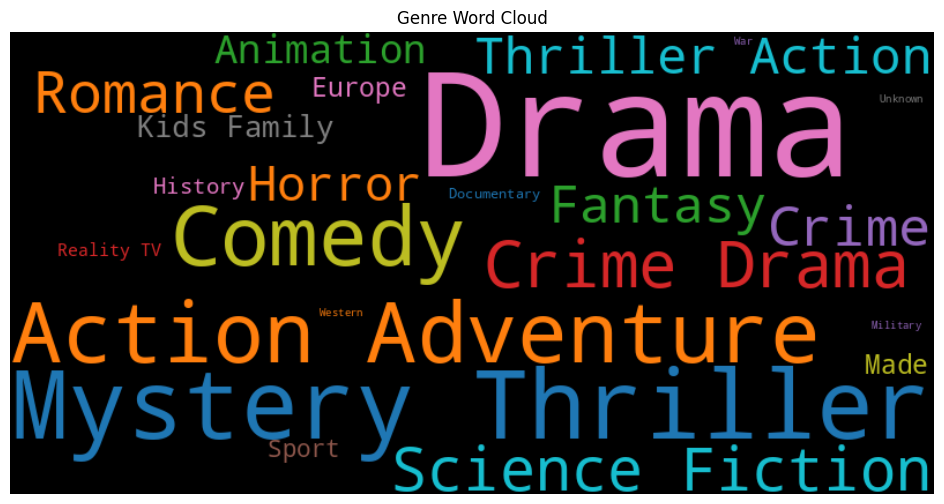

In [51]:
#Let's Visvalize it using word cloud
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine 'Genre' columns from both DataFrames
all_genres = pd.concat([
    movie_df['Genre'],
    tvshow_df['Genre']
], ignore_index=True)

# Drop missing values
all_genres = all_genres.dropna()

# Split and flatten genres
genre_series = all_genres.str.split(',').explode().str.strip()

# Combine into a single string (repeat genres based on frequency)
genre_text = ' '.join(genre_series)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='tab10').generate(genre_text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Genre Word Cloud")
plt.show()


## **Finding Predominant Streaming Service**

In [52]:
# Write Your Code here
# Combine movie and TV streaming platforms
all_services = pd.concat([
    movie_df['Streaming Service'],
    tvshow_df['Streaming Service']
], ignore_index=True)

# Drop missing values
all_services = all_services.dropna()

# Count occurrences of each platform
service_counts = all_services.value_counts()

# Display the top platforms
print("Top Streaming Services:")
print(service_counts.head(10))


Top Streaming Services:
Streaming Service
Amazon Prime Video    70
Netflix               51
JioHotstar            31
Apple TV              16
Bookmyshow             9
Apple TV+              7
Crunchyroll            5
JustWatch              4
Zee5                   4
Sony Liv               3
Name: count, dtype: int64


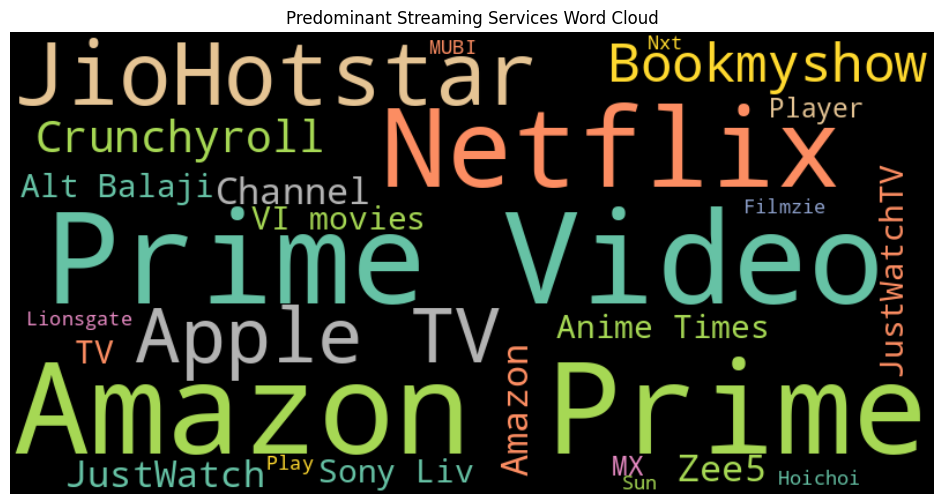

In [53]:
#Let's Visvalize it using word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert to one space-separated string
service_text = ' '.join(all_services.astype(str))

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Set2').generate(service_text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Predominant Streaming Services Word Cloud")
plt.show()

## **Task 3 :- Data Export**

In [54]:
#saving final dataframe as Final Data in csv format
import pandas as pd

final_data = pd.concat([movie_df, tvshow_df], ignore_index=True)

final_data.to_csv("Final Data.csv", index=False)

In [55]:
#saving filter data as Filter Data in csv format

# Filter high-rated movies and TV shows
high_rated_movies = movie_df[movie_df['IMDB Rating'] >= 8]
high_rated_tvshows = tvshow_df[tvshow_df['IMDB Rating'] >= 8]

# Add a 'Type' column to distinguish them (optional but useful)
high_rated_movies = high_rated_movies.copy()
high_rated_tvshows = high_rated_tvshows.copy()
high_rated_movies['Type'] = 'Movie'
high_rated_tvshows['Type'] = 'TV Show'

# Combine into one DataFrame
filter_data = pd.concat([high_rated_movies, high_rated_tvshows], ignore_index=True)

# converting to csv
filter_data.to_csv("High_Rated_Content.csv", index=False)


# **Dataset Drive Link (View Access with Anyone) -**

# ***Congratulations!!! You have completed your Assignment.***